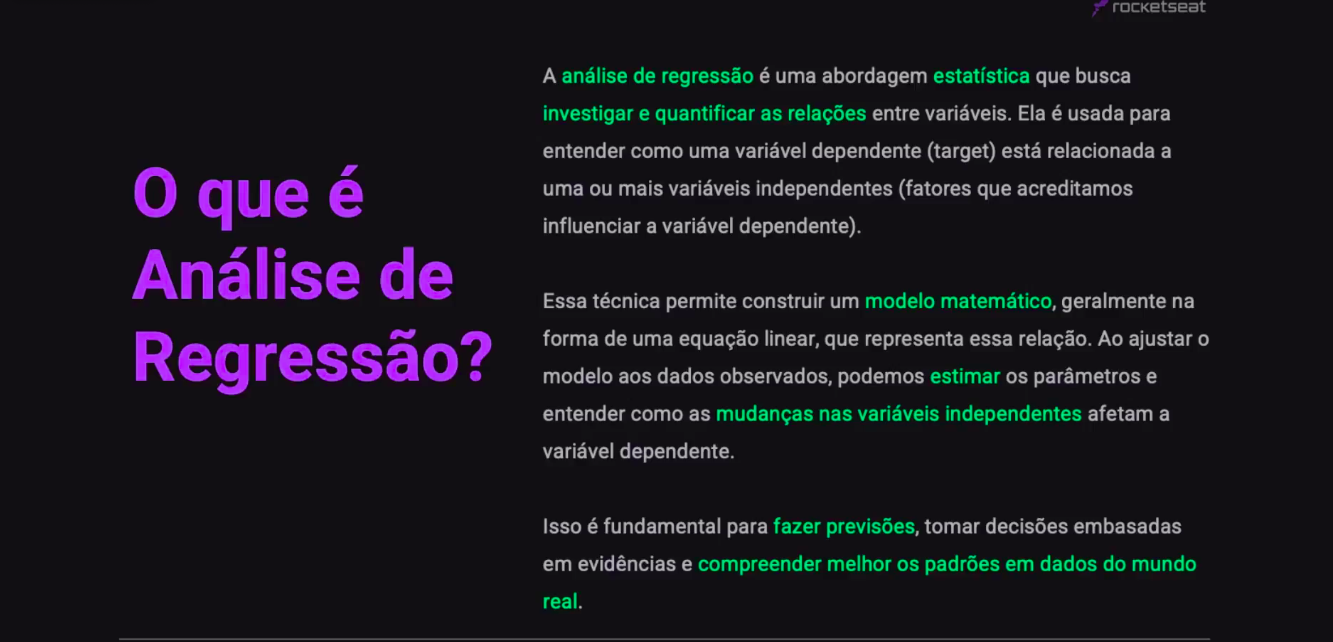

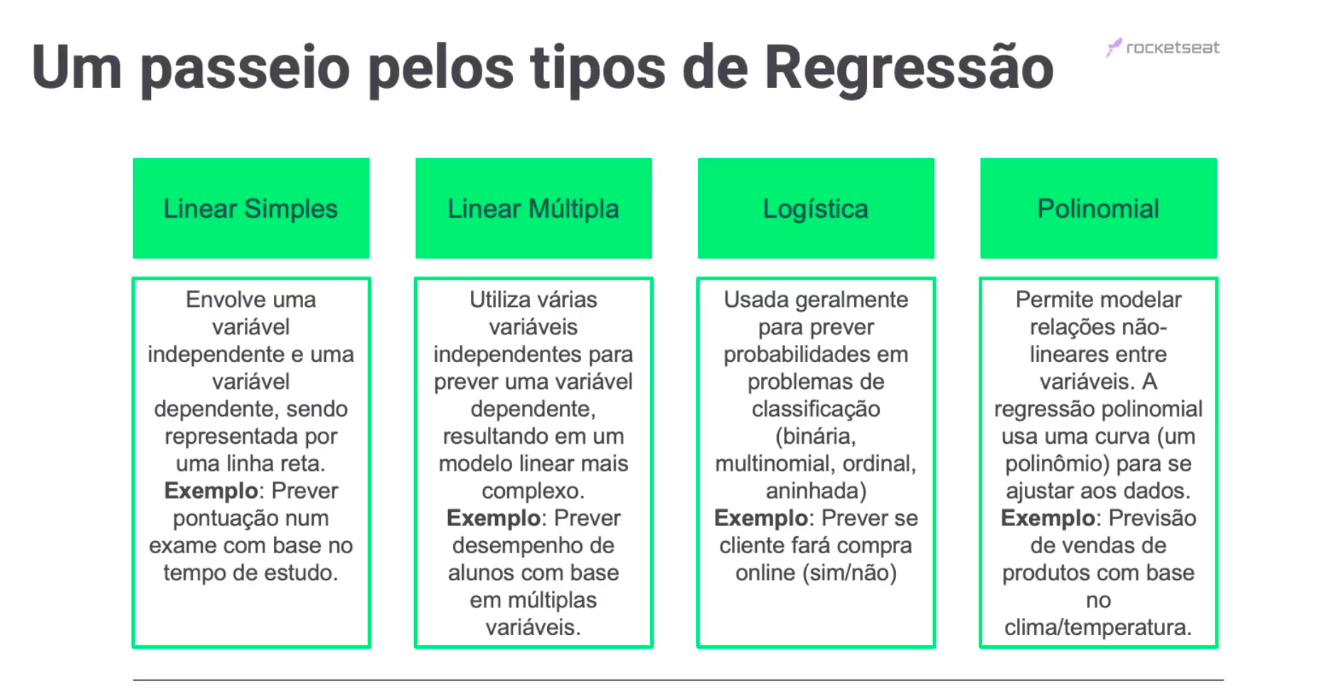

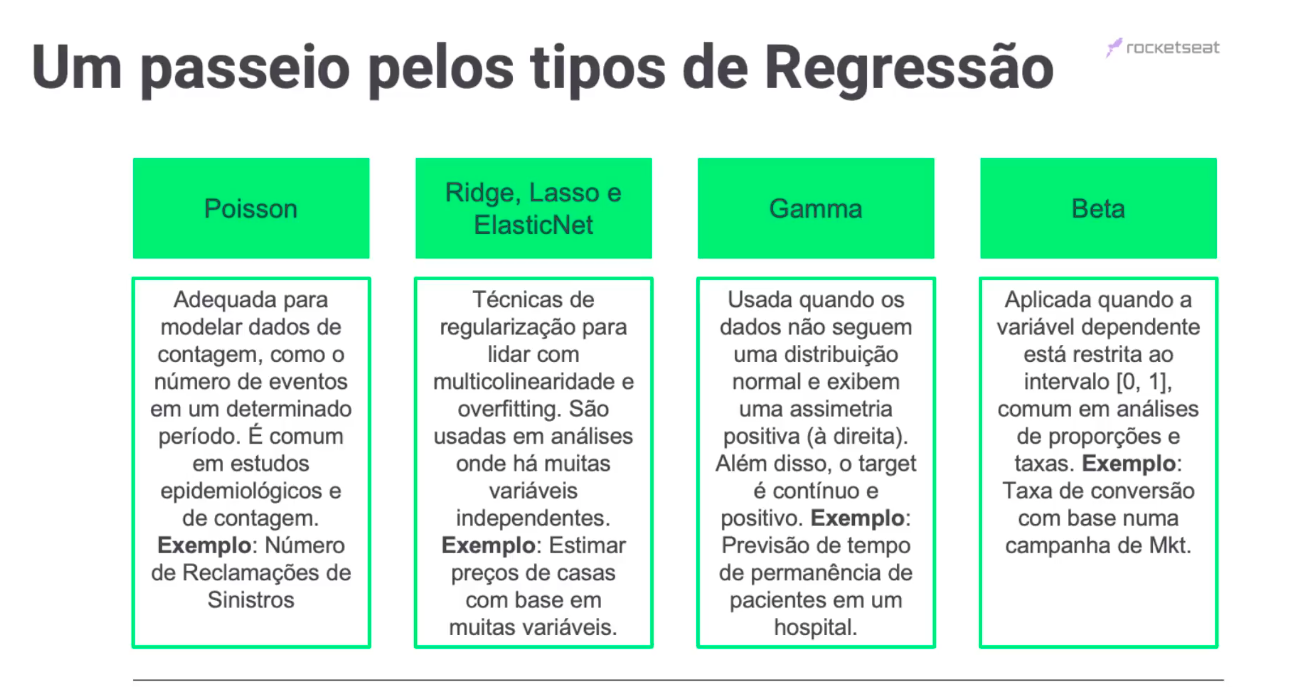

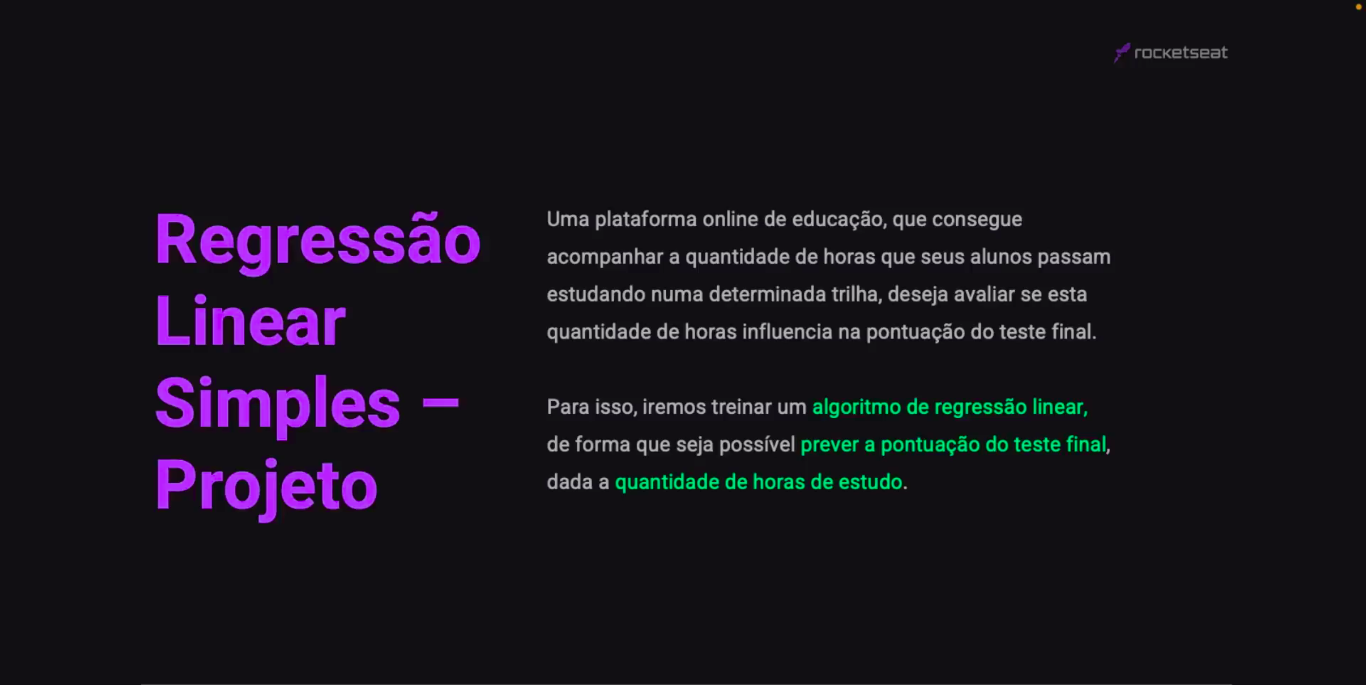

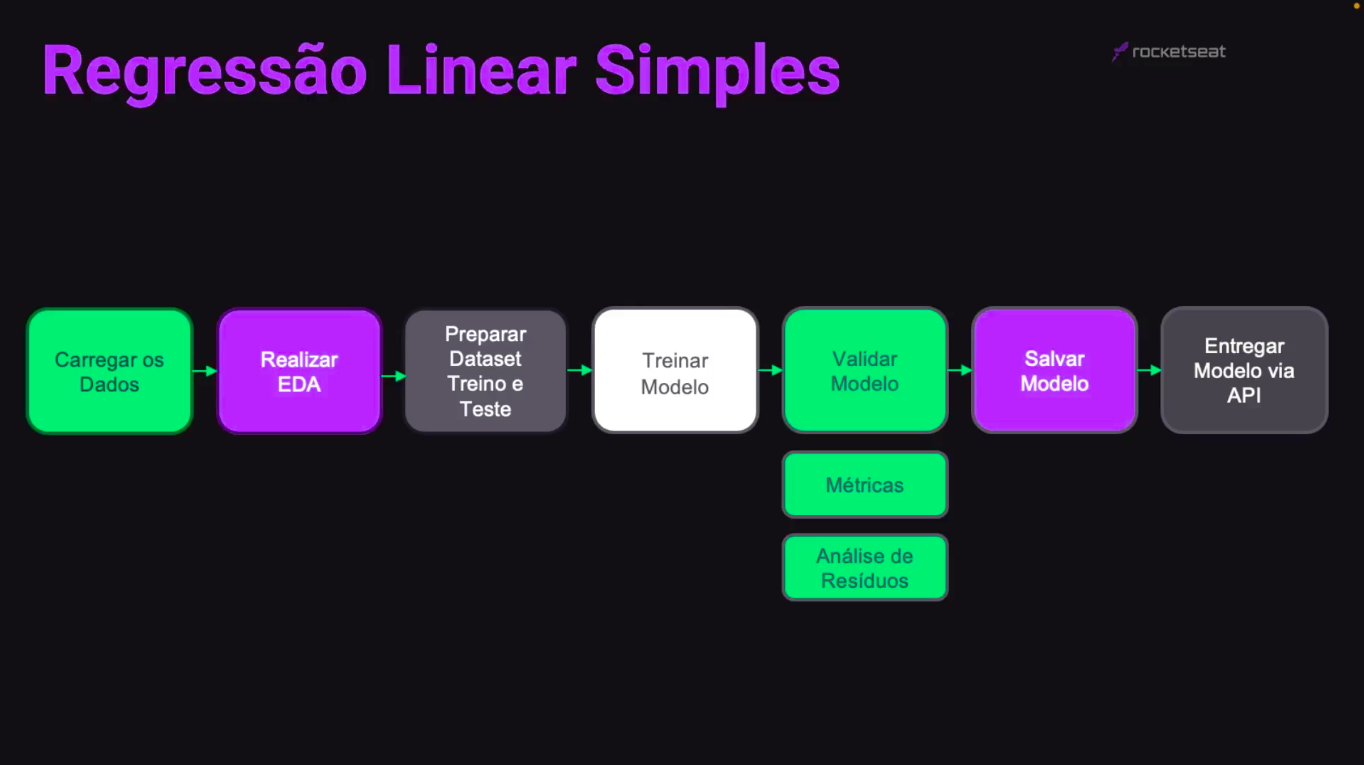

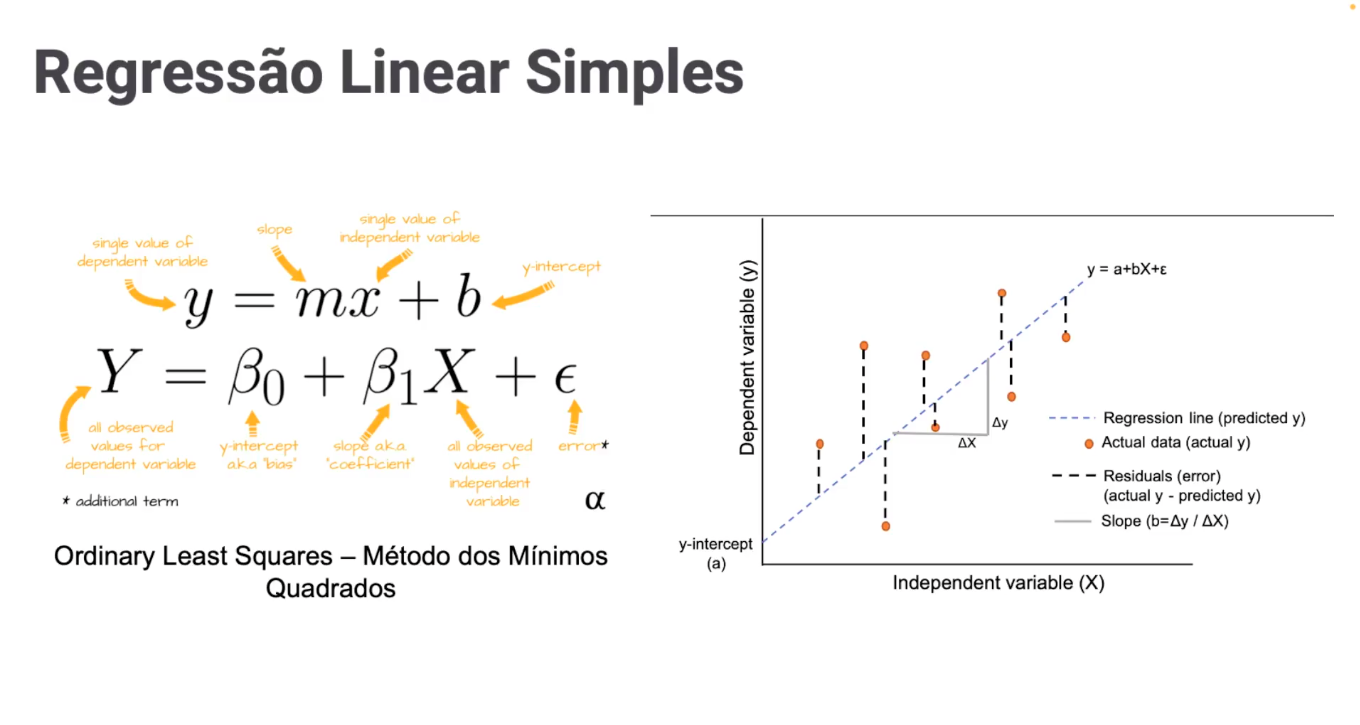

# Imports

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [3]:
# Abrir o dataset
import pandas as pd
df_pontuacao = pd.read_csv('./Dataset/dataset.csv')

In [4]:
# Checar a estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
# Visualizar topo do df
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [6]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [7]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

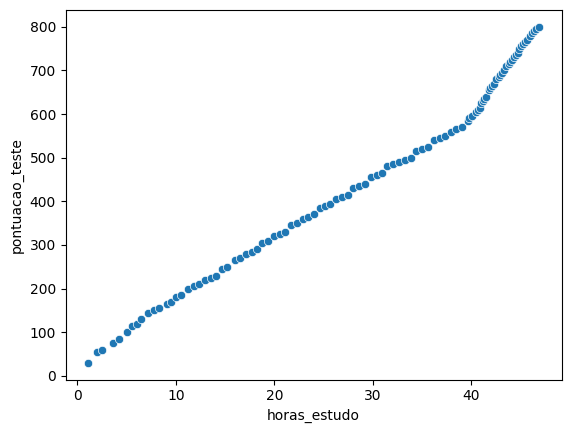

In [8]:
# Plot de dispersão
# X - horas_estudo
# Y - pontuação_teste
sns.scatterplot(data=df_pontuacao, x="horas_estudo", y="pontuacao_teste")

<Axes: ylabel='horas_estudo'>

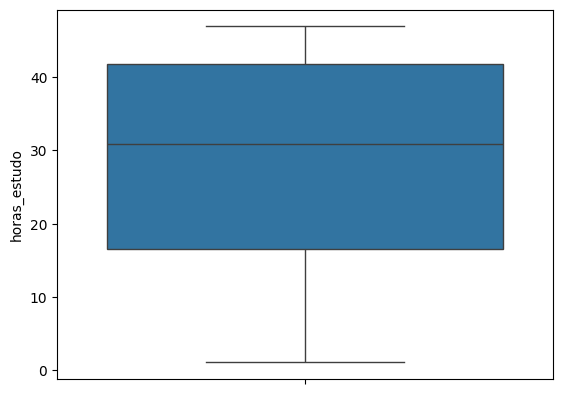

In [9]:
# Checar se há outliers
sns.boxplot(y=df_pontuacao['horas_estudo'])

<Axes: ylabel='pontuacao_teste'>

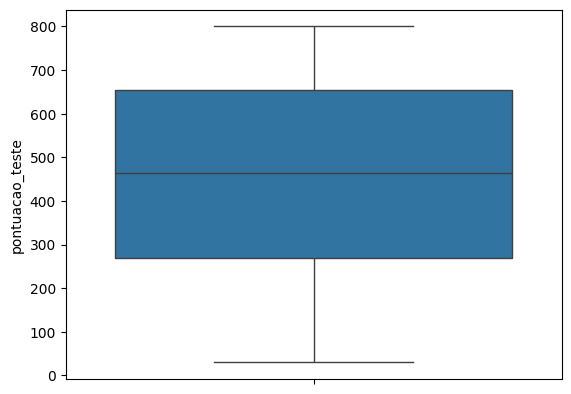

In [10]:
sns.boxplot(data=df_pontuacao, y="pontuacao_teste")

<Axes: >

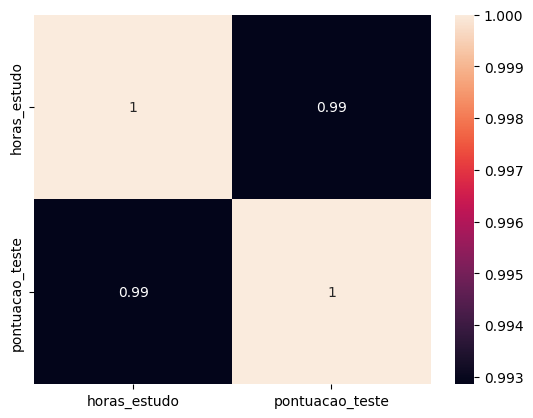

In [11]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

Há uma correlação bastante forte

<Axes: >

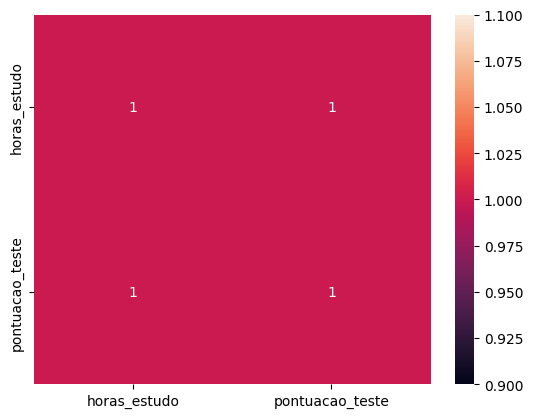

In [12]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr(method='spearman'), annot=True)

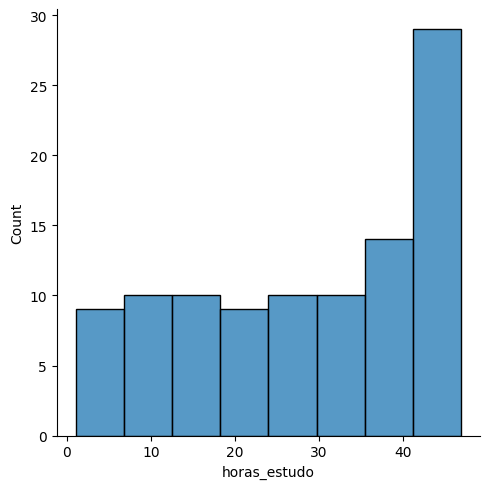

In [13]:
# Histograma das variáveis
sns.displot(x=df_pontuacao['horas_estudo'])

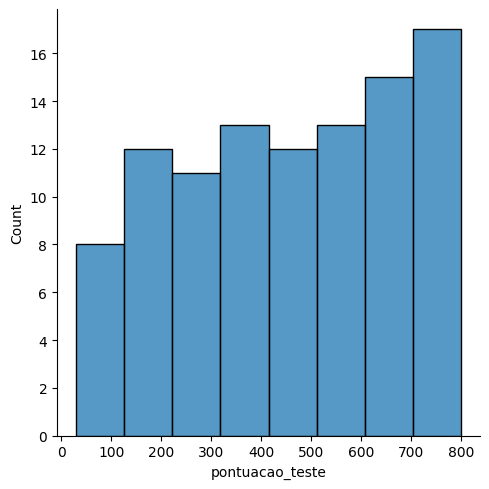

In [14]:
sns.displot(x=df_pontuacao['pontuacao_teste'])

Podemos constatar que ambas variáveis têm uma correlação forte, e que ambas as distribuições são assimétricas (não tem shape de sino).

# Treinar Modelo

In [15]:
# Dividir dataset entre treino e teste
# Quando estamos falando de uma feature apenas, precisamos ajustar o shape da distribuição
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
Y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [16]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [17]:
# Treinar o modelo
reg_model.fit(X_train, Y_train)

LinearRegression()

In [18]:
# Imprimir a equação da reta
# Y = m * X + b
print('Equação da reta:')
print('y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Equação da reta:
y = 15.642619x + 8.476601


### Validar modelo - Métricas

In [19]:
# Predição dos valores com base no conjunto de testes
def predict(X_test, model):
    y_pred = model.predict(X_test)
    return y_pred

In [20]:
y_pred = predict(X_test, reg_model)

In [21]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é variável pela variável independente.
# Quanto mais próximo de 1, mais próximo do valor real.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_score(Y_test, y_pred)

0.9828400452912442

In [22]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Media (Y_test - y_pred)
# É uma métrica fácil de interpretar
# MAE é menos sensível a outliers
mean_absolute_error(Y_test, y_pred).__round__()

23

In [23]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = (1/n) * Σ(y_i - y_hat_i)^2
# MSE = média (y+test - y_pred)²
# Não é facil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
mean_squared_error(Y_test, y_pred)

766.9972992416427

Não é a escala da pontuação

In [24]:
# Calcular métrica RMSE (Square Root Mean Squared Error)
# RMSE = Raiz (média (y+test - y_pred)²)
# É facil de interpretar
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred, squared= False)

/Users/eduardobatista/.local/share/virtualenvs/Lin_Reg_Proj-IRX18F_G/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


27.69471608884342

<Axes: >

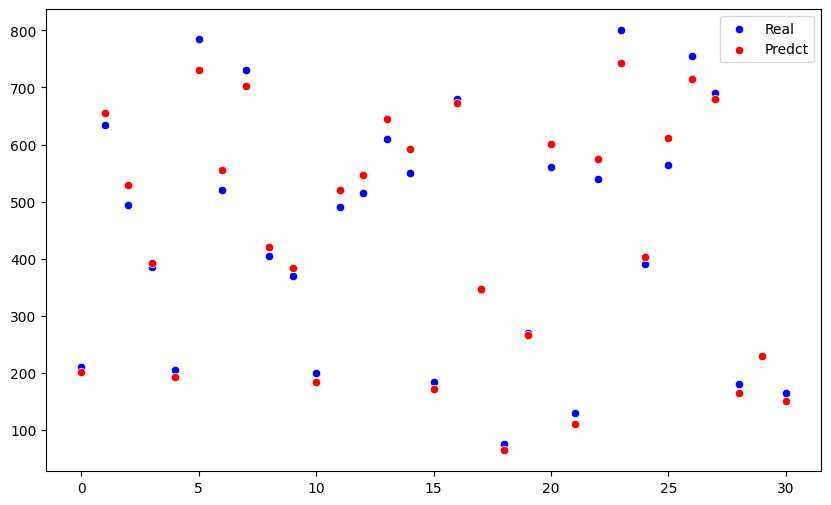

In [25]:
# Análise Gráfica
x_axis = range(len(Y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=Y_test.reshape(-1), color="blue", label="Real")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label="Predct")
# plt.legend()
# plt.show()

# Análise de Resíduos

In [26]:
# Calcular resíduos
residuos = Y_test - y_pred

In [27]:
# Calcular os resíduos padronizados (standardzation)
# pAra cada elemento de um conjunto (X - média) / desvio padrão
from scipy.stats import zscore

residuos_std = zscore(residuos)

In [28]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e 2 (na escala padrão), o modelo é linear.

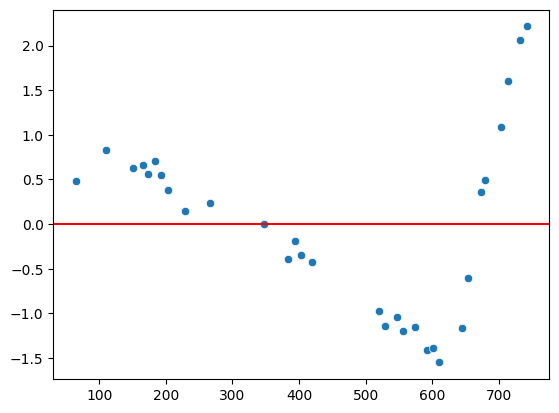

In [29]:
# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Se os valores estiverem em torno da reta, temos homcedasticidade, caso contrário, 
# se tivermos alguma tendência ou padrão (formam um cone, funil), 
# há heterocedasticidade.

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0, color='r', linestyle='-')

As variâncias não são homogêneas e temos resíduos acima de 2, logo em termos de resíduo, esse modelo linear não conseguiu atingir a acurácia esperada.

Text(0, 0.5, 'Resíduos na escala padrão')

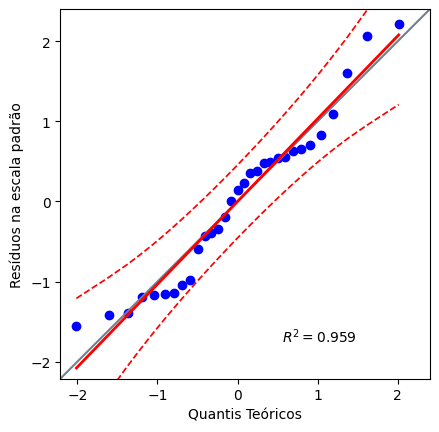

In [30]:
# Checar se resíduos seguem um distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distruibuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

Do ponto de vista de análise gráfica de resíduos, o modelo não vai fazer boas predições. 

### Teste de Normalidade

In [31]:
# Teste Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-value > 0.05 não rejeita H0 e segue a distribuição normal
stat_shapiro, p_value_shapiro = shapiro(residuos.reshape(-1))

In [32]:
print(f'Estatística do teste: {stat_shapiro} e P-Value: {p_value_shapiro}')

Estatística do teste: 0.9500532226161759 e P-Value: 0.15663817850304967


No teste de SW, mostrou que a distribuição é normal

In [33]:
# Teste Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')
print(f'Estatística do teste: {stat_ks} e P-Value: {p_value_ks}')

Estatística do teste: 0.48355808450512827 e P-Value: 3.395368995814077e-07


No teste KS, o p-value é bem inferior a 0.05, logo rejeitamos H0

Tendo em vista o problema e a grandeza dos valores em questão, podemos concluir que o modelo atende matematicamente o propósito (temos um erro penalizado de 27, enquanto o valor máximo é 800).

## Salvar Modelo para acessá-lo depois

In [34]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']